# Replicating Calvano et al. (2020)
## Baseline - Stat des - Profits
### Author: Andréa Epivent

In [1]:
# Set working directory
import os
path = os.getcwd()

# Import packages
exec(open(path+"/packages.py").read())

# Import custom functions
from functions import *

# Import parameters
exec(open(path+"/parameters.py").read())

In [2]:
# Import data from training
q_table_1 = np.load(path+'/Output/Baseline/q_table_a1.npy')
q_table_2 = np.load(path+'/Output/Baseline/q_table_a2.npy')
A = np.load(path+'/Output/Baseline/actions.npy')
S = np.load(path+'/Output/Baseline/states.npy')
conv_info = np.load(path+'/Output/Baseline/conv_info.npy')
price1 = np.load(path+'/Output/Baseline/price1.npy')
price2 = np.load(path+'/Output/Baseline/price2.npy')

### Analysis of extra-profit gains

#### Retrieve extra-profit gains

In [3]:
extra_profit = np.zeros((n_episodes,))
for j in range(n_episodes):
    extra_profit[j] = extra_profit_compute(price1[j],price2[j]) # vectorize
    
# Using 10 forward price
f_price1, f_price2 = get_forward_prices(10,q_table_1,q_table_2,conv_info,S,A)

n_prices = 10
f_extra_profit = np.zeros((n_episodes,n_prices))
for j in range(n_episodes):
    for i in range(n_prices):
        f_extra_profit[j,i] = extra_profit_compute(f_price1[j][i],f_price2[j][i])

f_extra_profit = f_extra_profit.mean(axis=1)

In [4]:
# Save for later use
np.save(path+'/Output/Baseline/extra_profit', extra_profit)
np.save(path+'/Output/Baseline/f_extra_profit', f_extra_profit)

#### Descriptive statistics

* Processing

In [5]:
# Concatenate info in dataframe
df_extra_profit = pd.DataFrame(extra_profit,columns=["(Last) Extra profit"])
df_extra_profit["Forward mean extra profit"] = f_extra_profit

* Descriptive statistics for single final price (Figure 5)

Text(0, 0.5, '(Last) Extra profit')

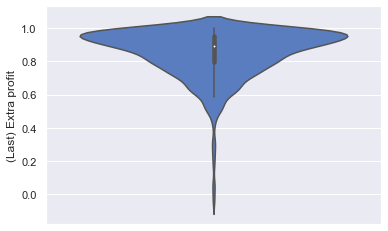

In [6]:
ax = sns.violinplot(y="(Last) Extra profit",data=df_extra_profit,palette="muted")
plt.ylabel('(Last) Extra profit')

* Descriptive statistics averaging forward 10 prices

Text(0, 0.5, 'Forward mean extra profit')

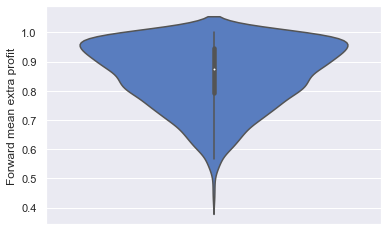

In [7]:
ax = sns.violinplot(y="Forward mean extra profit",data=df_extra_profit,palette="muted")
plt.ylabel('Forward mean extra profit')